#  Facial Recognition for One-shot Image Recognition

## import libraries

In [1]:
# Import standard dependencies
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
import shutil

In [2]:
print(tf.__version__)

2.14.0


## 1.3 Create Folder Structures for storing Dataset

In [11]:
!pwd

/home/avulasaikrishna/DL


In [3]:
# Set paths of directories
os.mkdir('dataset')
TRUE_PATH = os.path.join('dataset', 'true_images')
FALSE_PATH = os.path.join('dataset', 'false_images')
INPUT_PATH = os.path.join('dataset', 'input_images')

In [4]:
# Make the directories
os.makedirs(TRUE_PATH)
os.makedirs(FALSE_PATH)
os.makedirs(INPUT_PATH)

## 1.4 Collect Dataset (True, False, and Input Images)

In [5]:
!unzip images.zip #unzip the images.zip dataset

'unzip' is not recognized as an internal or external command,
operable program or batch file.


#### 1.4.1 False_Images-
1. we put images of images/Colin_Powell into false_image. False_image directory contains the images which will not be seen by model for training purpose.

#### True_images, input_images and false_images:
 True images are for the validation of the input images, that means: are these images similar to the images inside the true images folder. 
 False images are validating that the input images are dissimilar to the images inside the False images folder. And the label corresponds to the input image and false images will be 0 because of their dissimilarity.

In [10]:
#transfer images from images directory to dataset/false_images directory
path = 'images'
for folder in os.listdir(path):
    if folder != 'Colin_Powell':
        print(folder)
        for img_file in os.listdir(os.path.join(path,folder)):
            CURRENT_PATH= os.path.join(path, folder, img_file)
            NEW_PATH = os.path.join(FALSE_PATH, img_file)
            shutil.copy(CURRENT_PATH, NEW_PATH)
    else: #transfer images from images directory to dataset/input_images and dataset/true_images directory
        for img_file in os.listdir(os.path.join(path,folder)):
            CURRENT_PATH= os.path.join(path, folder, img_file)
            NEW_PATH1 = os.path.join(TRUE_PATH, img_file)
            NEW_PATH2 = os.path.join(INPUT_PATH, img_file)
            shutil.copy(CURRENT_PATH, NEW_PATH1)
            shutil.copy(CURRENT_PATH, NEW_PATH2)

Ariel_Sharon
Arnold_Schwarzenegger
BIM2016002
Donald_Rumsfeld
George_W_Bush
Gerhard_Schroeder
Hugo_Chavez
IHM2016005
IIT2016044
IIT2016135
ITM2016007
Jacques_Chirac
Tony_Blair
Vladimir_Putin


In [11]:
#total number of images - 
len(os.listdir(FALSE_PATH)), len(INPUT_PATH)

(140, 20)

#### 1.4.2 Collect True and Input Images-

In [14]:
# library to generate unique image names
import uuid

In [28]:
#os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
os.path.join(TRUE_PATH, f"{uuid.uuid1()}.jpg")

'dataset/true_images/a18bd3ba-5dec-11ee-8e9e-ac1f6bc3ce4e.jpg'

## 1.5 data agumentation
1. a technique to increase the diversity of your training set by applying random (but realistic) transformations.
2. The `tf.image` module contains various functions for image processing and decoding-encoding Ops.
    1. Adjust the brightness of images by a random factor deterministically.
    2. Adjust the contrast of images by a random factor deterministically.
    3. Randomly flip an image horizontally (left to right) deterministically.
    4. Randomly changes jpeg encoding quality for inducing jpeg noise
    5. Adjust the saturation of RGB images by a random factor deterministically.
    
    seed-Guarantees the same results given the same seed independent of how many times the function is called


In [9]:
def data_aug(img):
  data = []
  for i in range(9):
    img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
    img = tf.image.stateless_random_contrast(img, lower=0.6,upper= 1, seed=(1,3))
    img = tf.image.stateless_random_flip_left_right(img, seed = (np.random.randint(100),np.random.randint(100)))
    img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90,max_jpeg_quality=100, seed = (np.random.randint(100),np.random.randint(100)))
    img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1,seed = (np.random.randint(100),np.random.randint(100)))

    data.append(img)

  return data
                                                                                                                                              

In [12]:
#printing all the files in input_images
for file_name in os.listdir(os.path.join(INPUT_PATH)):
    img_path = os.path.join(INPUT_PATH, file_name)
    print(img_path)

dataset\input_images\Colin_Powell_0001.jpg
dataset\input_images\Colin_Powell_0002.jpg
dataset\input_images\Colin_Powell_0003.jpg
dataset\input_images\Colin_Powell_0004.jpg
dataset\input_images\Colin_Powell_0005.jpg
dataset\input_images\Colin_Powell_0006.jpg
dataset\input_images\Colin_Powell_0007.jpg
dataset\input_images\Colin_Powell_0008.jpg
dataset\input_images\Colin_Powell_0009.jpg
dataset\input_images\Colin_Powell_0010.jpg


In [15]:
#input images augumentation
for file_name in os.listdir(os.path.join(INPUT_PATH)):
    img_path = os.path.join(INPUT_PATH, file_name)
    img = cv2.imread(img_path)
    aug_imgs = data_aug(img)

    for image in aug_imgs:
        cv2.imwrite(os.path.join(INPUT_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
    

In [16]:
#true images augumentation
for file_name in os.listdir(os.path.join(TRUE_PATH)):
    img_path = os.path.join(TRUE_PATH, file_name)
    img = cv2.imread(img_path)
    aug_imgs = data_aug(img)

    for image in aug_imgs:
        cv2.imwrite(os.path.join(TRUE_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

## 3.1 Get Image Directories with Data API of tensorflow

In [17]:
input_fileset = tf.data.Dataset.list_files(INPUT_PATH+'/*.jpg').take(20)
true_fileset= tf.data.Dataset.list_files(TRUE_PATH+'/*.jpg').take(20)
false_fileset = tf.data.Dataset.list_files(FALSE_PATH+'/*.jpg').take(20)

In [18]:
input_fileset = tf.data.Dataset.list_files(INPUT_PATH+'/*.jpg').take(2000)
true_fileset= tf.data.Dataset.list_files(TRUE_PATH+'/*.jpg').take(2000)
false_fileset = tf.data.Dataset.list_files(FALSE_PATH+'/*.jpg').take(2000)

In [19]:
input_fileset,true_fileset,false_fileset

(<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>)

In [20]:
dir_test = input_fileset.as_numpy_iterator()

In [21]:
print(dir_test.next())

b'dataset\\input_images\\9888ff2c-5e02-11ee-872c-c8e5615eb605.jpg'


## 3.2 Accessing Image files and Preprocessing - Scale and Resize

In [22]:
def access_imgfiles_and_preprocess(file_path):
    
    # Read in image from file path( retrun the content of file as tensor)
    byte_img = tf.io.read_file(file_path)
    
    # Load in the image (Decode a JPEG-encoded image to a uint8 tensor.)
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 105x105x3
    img = tf.image.resize(img, (105,105))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

## 3.3 Create Labelled Dataset

In [21]:
# (input_images, true_images) => 1,1,1,1,1
# (input_images, false_images) => 0,0,0,0,0

In [23]:
trueset = tf.data.Dataset.zip((input_fileset, true_fileset, tf.data.Dataset.from_tensor_slices(tf.ones(len(input_fileset)))))
falseset = tf.data.Dataset.zip((input_fileset, false_fileset, tf.data.Dataset.from_tensor_slices(tf.zeros(len(input_fileset)))))
dataset = trueset.concatenate(falseset)

## 3.4 Build Train and Test Partition after Preprocessing

In [24]:
def preprocess_dataset(input_file, validation_file, label):
    return(access_imgfiles_and_preprocess(input_file), access_imgfiles_and_preprocess(validation_file), label)

In [25]:
# Build dataloader pipeline
dataset = dataset.map(preprocess_dataset)
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=8000)

In [26]:
# Training partition
train_data = dataset.take(round(len(dataset)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [27]:
# Testing partition
test_data = dataset.skip(round(len(dataset)*.7))
test_data = test_data.take(round(len(dataset)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## 4. Model Construction and Training 

### Using Subclass API for Modeling

In [28]:
class CustomModel(Model):
    pass

### Customizing Training Steps 

In [29]:
class CustomModel(Model):
    def train_step(self, batch):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        #x, y = data
        x = batch[:2]
        # Get label
        y = batch[2]

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

## 4.1 Build Embedding Layer

In [30]:
def build_initial_model_layers(): 
    inp = Input(shape=(105,105,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return CustomModel(inputs=[inp], outputs=[d1], name='embedding')

In [31]:
embedding = build_initial_model_layers()

## 4.2 Build Distance Layer

In [32]:
# Siamese L1 Distance class
class DistanceLayer(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

## 4.3 Make Siamese Model

In [33]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(105,105,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(105,105,3))
    
    embedding = build_initial_model_layers()
    # Combine siamese distance components
    siamese_layer = DistanceLayer()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return CustomModel(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [34]:
model = make_siamese_model()

In [35]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (CustomModel)     (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [36]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [37]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [38]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('frmoidel.weights.best.hdf5')

## complie the model

In [39]:
model.compile(optimizer=opt, loss=binary_cross_loss)

## strat trainig loop

In [40]:
model.fit(train_data, epochs=5) #did only for 5 epochs, can be further increased for proper accuracy

Epoch 1/5
3/9 [=========>....................] - ETA: 1:23 - loss: 0.6959

: 

# 6. Evaluate Model

## 6.1 Import Metrics

In [71]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [72]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [73]:
# Make predictions
y_hat = model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 299ms/step


array([[0.9919672 ],
       [0.99942   ],
       [0.99995404],
       [0.99961436],
       [0.85480964],
       [0.994517  ],
       [0.81718236],
       [0.99889964],
       [0.9997084 ],
       [0.9184442 ],
       [0.9999192 ],
       [0.9998194 ],
       [0.9999352 ],
       [0.80713356],
       [0.65938693],
       [0.9999376 ]], dtype=float32)

In [74]:
# Post processing the results 
y_pred = [1 if prediction > 0.5 else 0 for prediction in y_hat ]
y_pred

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [75]:
y_true

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
      dtype=float32)

## 6.3 Calculate Metrics

In [76]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [77]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.9375

## 6.4 Viz Results

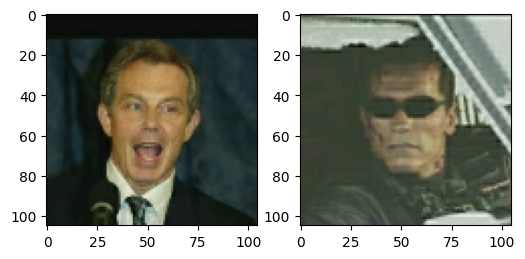

In [78]:
# Set plot size 
plt.figure(figsize=(6,6))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# 7. Save Model

In [79]:
# Save weights
model.save('SmartSense.h5')

/home/avulasaikrishna/DL/face_det/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
#tf.keras.models.save_model(model, 'final2000siamesemodel2.h5')

In [81]:
# Reload model 
 
ld_model = tf.keras.models.load_model('SmartSense.h5', 
                                   custom_objects = {"CustomModel": CustomModel, "DistanceLayer": DistanceLayer})

In [82]:
# Make predictions with reloaded model
ld_model.predict([test_input, test_val])

1/1 [==============================] - 0s 300ms/step


array([[0.9919672 ],
       [0.99942   ],
       [0.99995404],
       [0.99961436],
       [0.85480964],
       [0.994517  ],
       [0.81718236],
       [0.99889964],
       [0.9997084 ],
       [0.9184442 ],
       [0.9999192 ],
       [0.9998194 ],
       [0.9999352 ],
       [0.80713356],
       [0.65938693],
       [0.9999376 ]], dtype=float32)

In [83]:
# View model summary
ld_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (CustomModel)     (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 8. Real Time Test

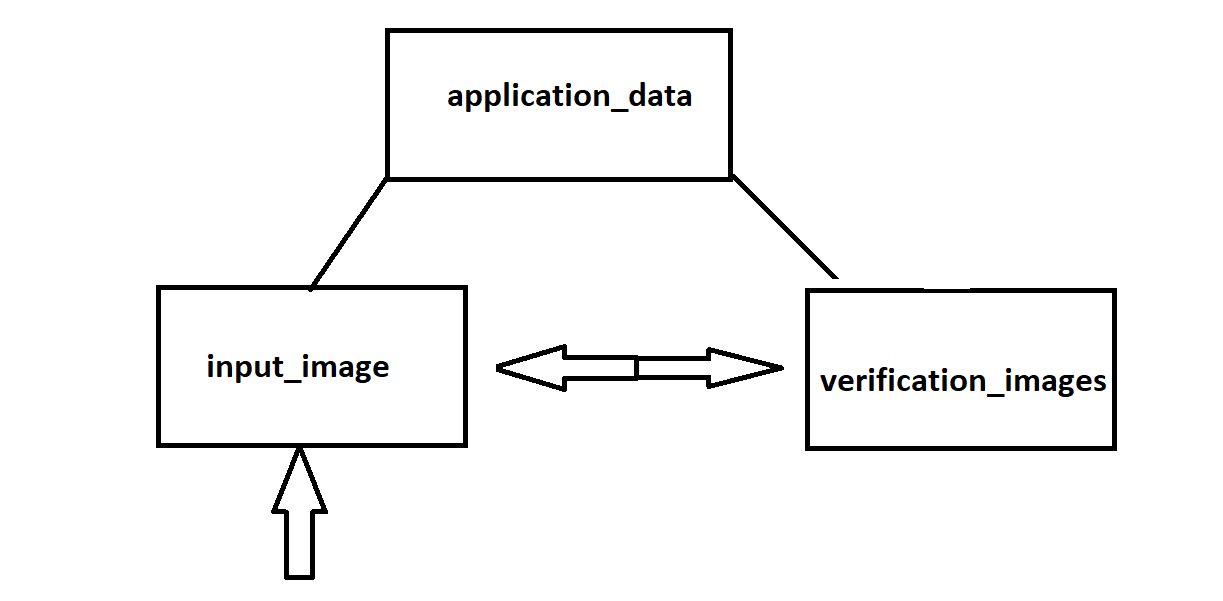

### 8.1 Verification Function

In [84]:
def verify_image(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = access_imgfiles_and_preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = access_imgfiles_and_preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [85]:
results, verified = verify_image(ld_model, 0.5, 0.5)
verified

FileNotFoundError: [Errno 2] No such file or directory: 'application_data/verification_images'

## 8.2 OpenCV Real Time Verification

In [87]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify_image(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@3324.877] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@3324.877] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


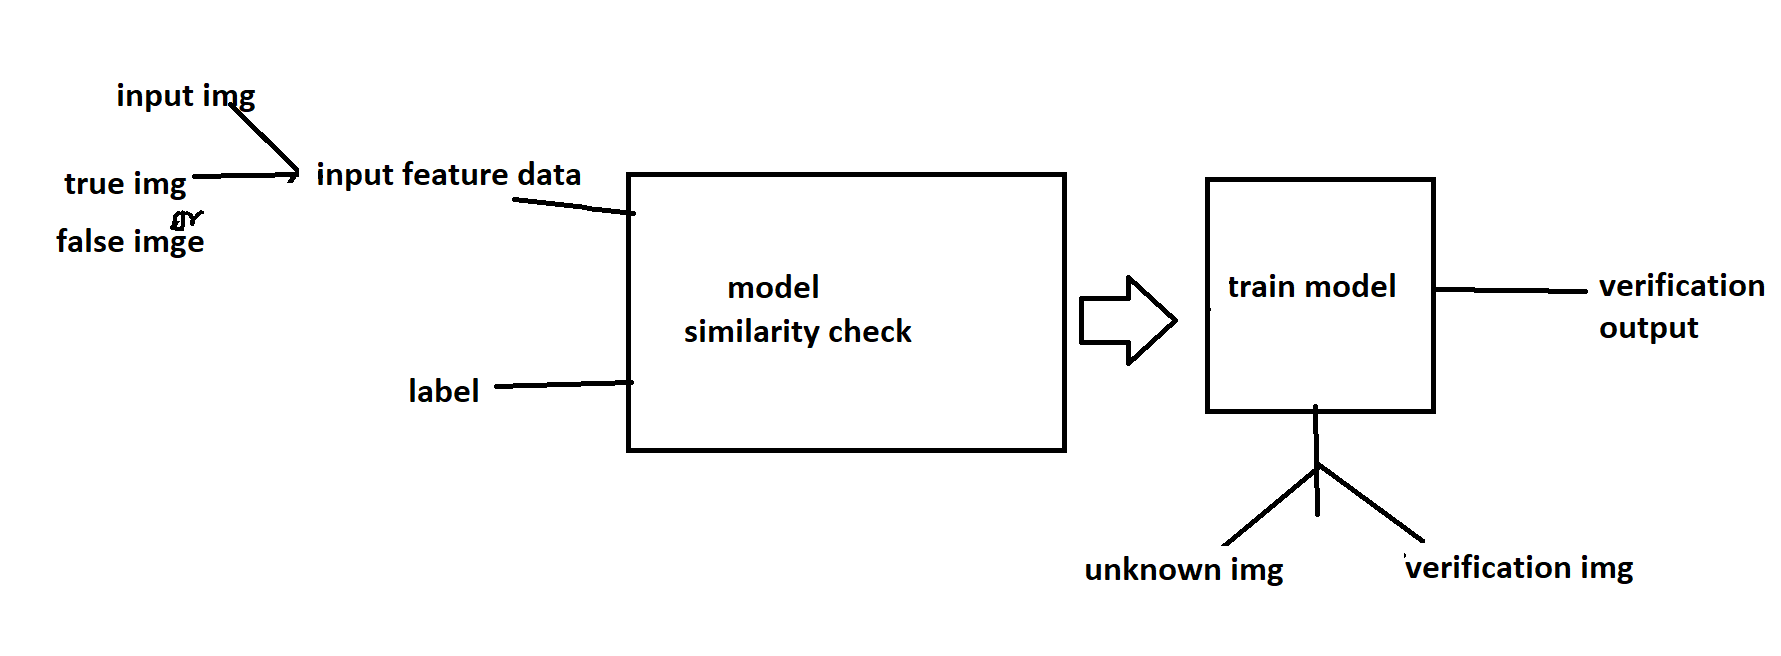